In [1]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# Membaca data dari file Excel
data = pd.read_excel("C:/Users/Biyan Daniswara/Downloads/Data Survei.xlsx")
data

,angkatan,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,2023,3,3,4,4,3,3,3,2,4,...,3,1,3,4,4,5,5,5,3,3
1,2023,1,1,1,1,1,5,1,1,1,...,1,1,1,1,1,1,1,1,5,5
2,2023,4,4,5,2,4,4,4,3,4,...,2,1,2,4,5,2,3,3,3,3
3,2024,3,2,1,4,3,4,5,3,5,...,3,1,1,5,5,5,5,5,1,3
4,2023,2,3,2,4,3,2,4,3,3,...,3,5,2,4,4,4,4,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2021,1,2,3,1,2,2,1,1,1,...,2,2,1,1,2,1,1,1,3,3
121,2021,1,2,2,1,2,1,1,1,1,...,2,2,1,1,3,1,1,3,2,2
122,2021,2,1,2,3,2,4,2,1,3,...,3,1,2,2,2,3,2,2,3,3
123,2021,3,1,2,3,2,4,3,1,3,...,2,1,3,3,3,3,3,3,4,3


In [3]:
# Menghapus kolom x karena hanya digunakan untuk stratifikasi sampling
df = data.drop(columns=['angkatan'])

In [4]:
# Menghitung statistik deskriptif
descriptive_stats = data.describe()

# Menampilkan statistik deskriptif
print(descriptive_stats)


          angkatan          X1          X2          X3          X4         X5  \
count   125.000000  125.000000  125.000000  125.000000  125.000000  125.00000   
mean   2022.760000    2.568000    2.200000    2.424000    2.992000    2.50400   
std       1.003221    0.953229    0.924575    1.165803    1.118005    1.03662   
min    2021.000000    1.000000    1.000000    1.000000    1.000000    1.00000   
25%    2022.000000    2.000000    2.000000    2.000000    2.000000    2.00000   
50%    2023.000000    3.000000    2.000000    2.000000    3.000000    2.00000   
75%    2024.000000    3.000000    3.000000    3.000000    4.000000    3.00000   
max    2024.000000    5.000000    4.000000    5.000000    5.000000    5.00000   

               X6         X7          X8          X9  ...        X11  \
count  125.000000  125.00000  125.000000  125.000000  ...  125.00000   
mean     2.640000    2.89600    2.040000    3.056000  ...    2.16000   
std      1.073132    1.20365    0.919327    1.159143  

In [5]:
# Korelasi Pearson
print(df.corr(method='pearson'))

           X1        X2        X3        X4        X5        X6        X7  \
X1   1.000000  0.190328  0.021016  0.534005  0.695477 -0.169026  0.529859   
X2   0.190328  1.000000  0.160112 -0.006241  0.129580  0.024384  0.171020   
X3   0.021016  0.160112  1.000000  0.064498  0.035288 -0.109069  0.008690   
X4   0.534005 -0.006241  0.064498  1.000000  0.497560 -0.224237  0.406891   
X5   0.695477  0.129580  0.035288  0.497560  1.000000 -0.227053  0.443076   
X6  -0.169026  0.024384 -0.109069 -0.224237 -0.227053  1.000000 -0.066680   
X7   0.529859  0.171020  0.008690  0.406891  0.443076 -0.066680  1.000000   
X8   0.516819  0.294122  0.164638  0.290627  0.418715 -0.058856  0.455646   
X9   0.569472  0.230261  0.024062  0.485740  0.379014  0.003371  0.553324   
X10  0.392129  0.211132  0.004146  0.249576  0.278547  0.012869  0.409928   
X11 -0.052678  0.112108  0.034774  0.094360 -0.023109  0.141664 -0.056645   
X12  0.253577  0.001640  0.150745  0.325933  0.237390 -0.365612  0.182229   

Text(0.5, 1.0, 'Correlation of Questionaire Instrument')

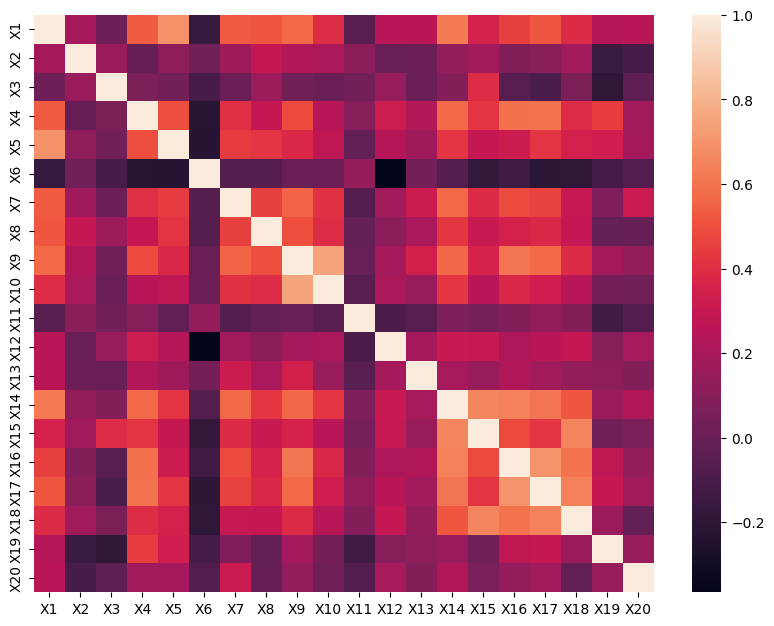

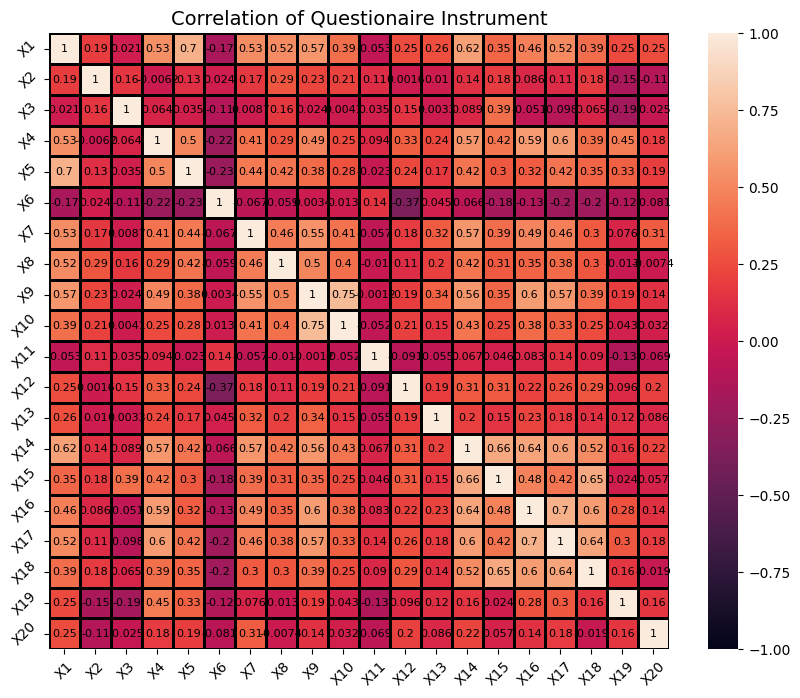

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix=df.corr()
corr_matrix
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix)

fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
    linewidths=0.75,
    linecolor='black',
    cbar=True,
    vmin=-1,
    vmax=1,
    annot=True,
    annot_kws={'size':8,'color':'black'})
plt.tick_params(labelsize=10,rotation=45)
plt.title('Correlation of Questionaire Instrument',size=14)

Uji Validitas

In [7]:
from scipy.stats import pearsonr

data_copy = df.copy()
data_copy['Total_Skor'] = data_copy.sum(axis=1) 
hasil_korelasi = {}

for kolom in data_copy.columns[:-1]: 
    korelasi, p_value = pearsonr(data_copy[kolom], data_copy['Total_Skor'])
    hasil_korelasi[kolom] = {'Korelasi': korelasi, 'P-Value': p_value}

hasil_df = pd.DataFrame(hasil_korelasi).T
print(hasil_df)

     Korelasi       P-Value
X1   0.738776  8.054469e-23
X2   0.284323  1.311352e-03
X3   0.179820  4.478852e-02
X4   0.705030  4.439117e-20
X5   0.617362  1.750625e-14
X6  -0.104346  2.468353e-01
X7   0.690025  5.565350e-19
X8   0.589902  4.527794e-13
X9   0.779920  8.515074e-27
X10  0.580951  1.225033e-12
X11  0.097691  2.784343e-01
X12  0.404791  2.837476e-06
X13  0.374080  1.728017e-05
X14  0.811985  1.527811e-30
X15  0.668511  1.617732e-17
X16  0.749953  7.995827e-24
X17  0.747196  1.429510e-23
X18  0.659172  6.411488e-17
X19  0.283857  1.336671e-03
X20  0.254496  4.182177e-03


Uji Reliabilitas

In [8]:
import pingouin as pg

pg.cronbach_alpha(data=df)

(0.8594960407925023, array([0.821, 0.893]))

Stratified Random Sampling

In [9]:
# Melakukan stratified random sampling berdasarkan kolom 'x'
train_data, _ = train_test_split(data, test_size=0.5, stratify=data['angkatan'], random_state=42)

In [10]:
# Menghapus kolom 'x' dari data sampel karena hanya digunakan untuk stratifikasi
data = train_data.drop(columns=['angkatan', 'X6', 'X11'])

In [11]:
data

,X1,X2,X3,X4,X5,X7,X8,X9,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20
42,3,4,2,3,3,2,2,2,1,1,3,2,2,2,1,3,4,3
74,1,2,3,2,2,1,1,1,1,2,1,1,3,2,2,3,2,3
26,3,1,2,4,1,3,2,4,3,4,3,4,5,5,4,5,3,3
29,3,1,4,4,3,2,2,2,1,2,3,3,4,4,2,4,4,3
12,3,2,2,5,3,4,3,4,5,2,1,4,4,5,5,5,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,3,2,4,2,2,4,3,4,4,3,3,3,3,4,4,4,3,3
88,3,2,2,3,4,5,3,4,4,1,3,4,4,4,2,3,3,3
114,3,2,1,3,3,3,2,2,2,2,3,2,2,3,2,2,3,3
14,4,2,1,5,5,5,3,5,4,1,4,1,1,5,5,1,5,3


Analisis Faktor

In [12]:
# Langkah 1: Uji KMO dan Bartlett
kmo_all, kmo_model = calculate_kmo(data)
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print("KMO Model:", kmo_model)
print("Bartlett’s Test chi-square:", chi_square_value, ", p-value:", p_value)

KMO Model: 0.7737386027815537
Bartlett’s Test chi-square: 593.4414480024255 , p-value: 3.896261877658554e-53


In [13]:
# Langkah 2: Menentukan jumlah faktor menggunakan Eigenvalues
fa = FactorAnalyzer(n_factors=data.shape[1], rotation=None)
fa.fit(data)
eigenvalues, vectors = fa.get_eigenvalues()
print("Eigenvalues:", eigenvalues)

Eigenvalues: [6.78110066 1.78579619 1.63797956 1.25167836 1.03345317 0.95263591
 0.80136155 0.70262999 0.66487403 0.5184815  0.41807792 0.36980564
 0.26674417 0.22063369 0.21157735 0.16996552 0.11754698 0.09565779]


In [14]:
# Melihat jumlah faktor yang memiliki eigenvalue > 1
num_factors = sum(eigenvalues > 1)
print("Jumlah faktor yang dipilih berdasarkan eigenvalue > 1:", num_factors)

Jumlah faktor yang dipilih berdasarkan eigenvalue > 1: 5


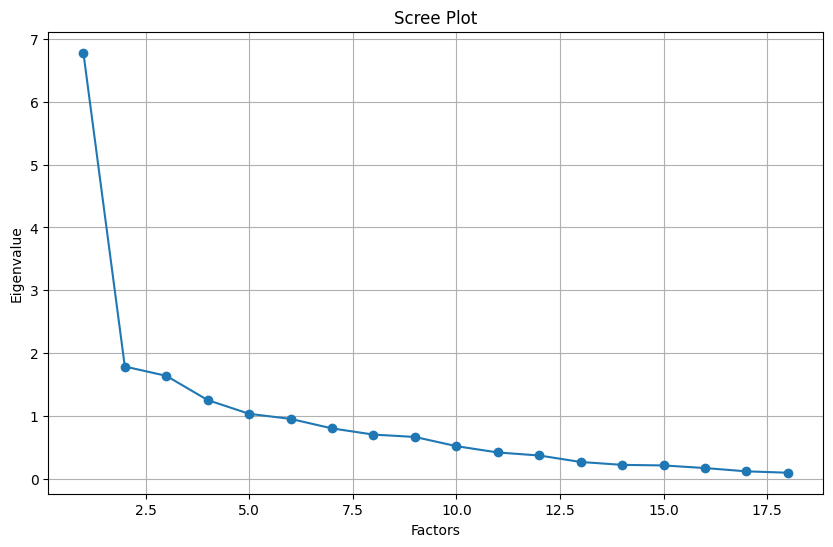

In [15]:
# Plot Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [16]:
# Langkah 3: Analisis Faktor dengan jumlah faktor terpilih dan rotasi Varimax
fa = FactorAnalyzer(n_factors=3, rotation="varimax")
fa.fit(data)
loadings = fa.loadings_
print("Muatan Faktor (Factor Loadings):\n", loadings)

Muatan Faktor (Factor Loadings):
 [[ 0.64381324  0.34581527  0.13015948]
 [ 0.06797972 -0.35353615  0.01869616]
 [-0.05897316 -0.06027774  0.53974332]
 [ 0.53306097  0.59658262  0.134956  ]
 [ 0.52243042  0.27546318  0.0772918 ]
 [ 0.71988131  0.23012522  0.17404676]
 [ 0.62338739 -0.30623817  0.20912094]
 [ 0.85392004  0.10298461 -0.0397258 ]
 [ 0.56256621 -0.04599908 -0.07004097]
 [ 0.18587891  0.4752204   0.273655  ]
 [ 0.41051206  0.10485656  0.04387734]
 [ 0.57337775  0.40216347  0.4780178 ]
 [ 0.33545105  0.2463464   0.81523312]
 [ 0.70699953  0.30342425  0.19362162]
 [ 0.68866683  0.34852135  0.07221518]
 [ 0.48467137  0.14805779  0.39123453]
 [ 0.33869769  0.54988155 -0.3818892 ]
 [ 0.23043007  0.48475084  0.09331443]]


In [17]:
# Menghitung skor faktor
factor_scores = fa.transform(data)
factor_scores_df = pd.DataFrame(factor_scores, columns=['Faktor1', 'Faktor2', 'Faktor3'])

print("Skor Faktor:\n", factor_scores_df)

Skor Faktor:
      Faktor1   Faktor2   Faktor3
0  -0.502210 -0.215580 -0.889932
1  -1.703617 -0.345928  0.695745
2   0.637282  0.701810  1.320197
3  -0.632637  0.733024  0.624478
4   1.293016  0.446629  0.242421
..       ...       ...       ...
57  0.999489 -0.881986 -0.022050
58  1.166370 -0.831385  0.347316
59 -0.302327  0.001562 -0.668920
60  2.160568  0.172476 -2.638403
61 -0.636239  0.673045  0.246419

[62 rows x 3 columns]


In [18]:
# Daftar nama variabel (baris) dan nama faktor (kolom)
variable_names = [f'var{i+1}' for i in range(loadings.shape[0])]
factor_names = [f'Faktor{j+1}' for j in range(loadings.shape[1])]

# Konversi loadings menjadi DataFrame
loadings_df = pd.DataFrame(loadings, index=variable_names, columns=factor_names)

# Fungsi untuk menampilkan variabel dengan loading tertinggi untuk setiap faktor
# sehingga setiap variabel hanya masuk ke salah satu faktor
def display_highest_loadings_no_threshold(loadings_df):
    # Buat DataFrame untuk menyimpan faktor tertinggi per variabel
    factor_assignments = pd.DataFrame(index=loadings_df.index, columns=['Faktor', 'Loading'])
    
    # Loop untuk setiap variabel
    for var in loadings_df.index:
        # Ambil faktor dengan loading tertinggi untuk variabel tersebut
        highest_loading = loadings_df.loc[var].abs().idxmax()  # Faktor dengan loading tertinggi
        factor_assignments.loc[var] = [highest_loading, loadings_df.loc[var, highest_loading]]
    
    # Cetak variabel yang dialokasikan ke setiap faktor
    for factor in loadings_df.columns:
        assigned_vars = factor_assignments[factor_assignments['Faktor'] == factor].index.tolist()
        print(f"\nVariabel dengan loading tertinggi untuk {factor}:")
        print(assigned_vars)

# Contoh penggunaan:
display_highest_loadings_no_threshold(loadings_df)



Variabel dengan loading tertinggi untuk Faktor1:
['var1', 'var5', 'var6', 'var7', 'var8', 'var9', 'var11', 'var12', 'var14', 'var15', 'var16']

Variabel dengan loading tertinggi untuk Faktor2:
['var2', 'var4', 'var10', 'var17', 'var18']

Variabel dengan loading tertinggi untuk Faktor3:
['var3', 'var13']


In [19]:
# Menampilkan varians yang dijelaskan
variance_explained = fa.get_factor_variance()
print("Varians yang Dijelaskan:\n", variance_explained)

Varians yang Dijelaskan:
 (array([4.9533746 , 2.07152032, 1.73354285]), array([0.27518748, 0.11508446, 0.09630794]), array([0.27518748, 0.39027194, 0.48657988]))


In [20]:
# Langkah 4: Pemeriksaan Kesesuaian Model
# Total varians dijelaskan dan interpretasi faktor
total_variance = sum(variance_explained[1])
print("Total Varians Dijelaskan:", total_variance)

Total Varians Dijelaskan: 0.4865798759304437


ANOVA

In [21]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

# Menambahkan kolom grup berdasarkan nilai Faktor1
factor_scores_df['Group_Factor1'] = np.where(factor_scores_df['Faktor1'] > 1, 'High',
                             np.where(factor_scores_df['Faktor1'] < -1, 'Low', 'Medium'))

# Model ANOVA
model_faktor1 = ols('Faktor1 ~ C(Group_Factor1)', data=factor_scores_df).fit()
anova_table_faktor1 = sm.stats.anova_lm(model_faktor1, typ=2)

print(anova_table_faktor1)

                     sum_sq    df          F        PR(>F)
C(Group_Factor1)  41.448812   2.0  87.143636  2.439768e-18
Residual          14.031317  59.0        NaN           NaN


In [22]:
# Menambahkan kolom grup berdasarkan nilai Faktor2
factor_scores_df['Group_Factor2'] = np.where(factor_scores_df['Faktor2'] > 2, 'High',
                             np.where(factor_scores_df['Faktor2'] < -1, 'Low', 'Medium'))

# Model ANOVA
model_faktor2 = ols('Faktor2 ~ C(Group_Factor2)', data=factor_scores_df).fit()
anova_table_faktor2 = sm.stats.anova_lm(model_faktor2, typ=2)

print(anova_table_faktor2)

                     sum_sq    df          F        PR(>F)
C(Group_Factor2)  22.788170   2.0  29.018228  1.677490e-09
Residual          23.166508  59.0        NaN           NaN


In [23]:
# Menambahkan kolom grup berdasarkan nilai Faktor3
factor_scores_df['Group_Factor3'] = np.where(factor_scores_df['Faktor3'] > 2, 'High',
                             np.where(factor_scores_df['Faktor3'] < -1, 'Low', 'Medium'))

# Model ANOVA
model_faktor3 = ols('Faktor3 ~ C(Group_Factor3)', data=factor_scores_df).fit()
anova_table_faktor3 = sm.stats.anova_lm(model_faktor3, typ=2)

print(anova_table_faktor3)

                     sum_sq    df          F        PR(>F)
C(Group_Factor3)  25.340113   1.0  54.818914  5.109354e-10
Residual          27.735077  60.0        NaN           NaN


In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Post-hoc test untuk Faktor1
posthoc_factor1 = pairwise_tukeyhsd(factor_scores_df['Faktor1'], factor_scores_df['Group_Factor1'], alpha=0.05)
print("Post-hoc Tukey's HSD test untuk Faktor1:")
print(posthoc_factor1)

# Post-hoc test untuk Faktor2
posthoc_factor2 = pairwise_tukeyhsd(factor_scores_df['Faktor2'], factor_scores_df['Group_Factor2'], alpha=0.05)
print("Post-hoc Tukey's HSD test untuk Faktor2:")
print(posthoc_factor2)

# Post-hoc test untuk Faktor3
posthoc_factor3 = pairwise_tukeyhsd(factor_scores_df['Faktor3'], factor_scores_df['Group_Factor3'], alpha=0.05)
print("Post-hoc Tukey's HSD test untuk Faktor3:")
print(posthoc_factor3)


Post-hoc Tukey's HSD test untuk Faktor1:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -2.8358   0.0 -3.3626 -2.3089   True
  High Medium  -1.4222   0.0 -1.7954  -1.049   True
   Low Medium   1.4135   0.0  0.9604  1.8667   True
---------------------------------------------------
Post-hoc Tukey's HSD test untuk Faktor2:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  High    Low  -4.1323    0.0  -5.437 -2.8276   True
  High Medium  -2.6936    0.0 -3.7778 -1.6095   True
   Low Medium   1.4387 0.0001   0.659  2.2184   True
----------------------------------------------------
Post-hoc Tukey's HSD test untuk Faktor3:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
----------------------------------------